In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, Aer
from qiskit.tools import job_monitor
from qiskit.visualization import array_to_latex

In [3]:
from qiskit_rigetti import RigettiQCSBackend, RigettiQCSJob, RigettiQCSProvider
from qiskit_rigetti import QuilCircuit

In [4]:
# Get provider and backend
provider = RigettiQCSProvider()
provider.backends()

[<RigettiQCSBackend('Aspen-11')>,
 <RigettiQCSBackend('Aspen-12')>,
 <RigettiQCSBackend('Aspen-M-2')>]

In [5]:
backend = provider.get_backend("Aspen-11")
backend

<RigettiQCSBackend('Aspen-11')>

In [6]:
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter

In [7]:
num_qubits = 2
qr = QuantumRegister(num_qubits)
meas_calibs, state_labels = complete_meas_cal(qr=qr)
len(meas_calibs)

4

In [8]:
meas_calibs[0].draw()

░ ┌─┐   
q0_0: ─░─┤M├───
       ░ └╥┘┌─┐
q0_1: ─░──╫─┤M├
       ░  ║ └╥┘
c0: 2/════╩══╩═
          0  1

In [9]:
# Execute the circuit on the backend
jobs = []
job_ids = []
results = []
path = [7,0,1,16,17,10,11,26,27,20,21,36,37,30,31]
for i in path:
    print("started", 6, "and", i)
    job = execute(meas_calibs, backend, shots=1 << 13, initial_layout=[6,i], optimization_level=3)
    jobs.append(job)
    results.append(job.result())
    print("finished", 6, "and", i)
    print()

started 6 and 7


/opt/conda/lib/python3.9/site-packages/qiskit_rigetti/_qcs_job.py:117: UserWarning: barriers are currently omitted during execution on a RigettiQCSBackend
  warnings.warn("barriers are currently omitted during execution on a RigettiQCSBackend")


finished 6 and 7

started 6 and 0
finished 6 and 0

started 6 and 1
finished 6 and 1

started 6 and 16
finished 6 and 16

started 6 and 17
finished 6 and 17

started 6 and 10
finished 6 and 10

started 6 and 11
finished 6 and 11

started 6 and 26
finished 6 and 26

started 6 and 27
finished 6 and 27

started 6 and 20
finished 6 and 20

started 6 and 21
finished 6 and 21

started 6 and 36
finished 6 and 36

started 6 and 37
finished 6 and 37

started 6 and 30
finished 6 and 30

started 6 and 31
finished 6 and 31



In [10]:
num_qubits = 8
qr = QuantumRegister(num_qubits)
meas_calibs, state_labels = complete_meas_cal(qr=qr)
len(meas_calibs)

256

In [11]:
meas_calibs[0].draw()

░ ┌─┐                     
q1_0: ─░─┤M├─────────────────────
       ░ └╥┘┌─┐                  
q1_1: ─░──╫─┤M├──────────────────
       ░  ║ └╥┘┌─┐               
q1_2: ─░──╫──╫─┤M├───────────────
       ░  ║  ║ └╥┘┌─┐            
q1_3: ─░──╫──╫──╫─┤M├────────────
       ░  ║  ║  ║ └╥┘┌─┐         
q1_4: ─░──╫──╫──╫──╫─┤M├─────────
       ░  ║  ║  ║  ║ └╥┘┌─┐      
q1_5: ─░──╫──╫──╫──╫──╫─┤M├──────
       ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
q1_6: ─░──╫──╫──╫──╫──╫──╫─┤M├───
       ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q1_7: ─░──╫──╫──╫──╫──╫──╫──╫─┤M├
       ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
c1: 8/════╩══╩══╩══╩══╩══╩══╩══╩═
          0  1  2  3  4  5  6  7

In [17]:
# Execute the circuit on the backend
import time
t1 = time.perf_counter()
job = execute(meas_calibs, backend, shots=1 << 13, initial_layout=[6,7,0,1,16,17,10,11], optimization_level=3)
t2 = time.perf_counter()
print(t2 - t1, "s")

/opt/conda/lib/python3.9/site-packages/qiskit_rigetti/_qcs_job.py:117: UserWarning: barriers are currently omitted during execution on a RigettiQCSBackend
  warnings.warn("barriers are currently omitted during execution on a RigettiQCSBackend")


352.2215647910489 s


In [18]:
result = job.result()

WARNING - Timeout on client tcp://bf07.qpu.production.qcs.rigetti.com:50053, method name get_buffers, class info: <rpcq._client.Client object at 0x7ff270b19220>, retrying in 0 seconds...


QCSHTTPStatusError: QCS API call POST https://api.qcs.rigetti.com/v1/engagements failed with status 400: {"code":"bad_request","message":"A reservation is required to engage, but you do not have a current reservation","requestId":"b16720cc-36fc-4475-9e02-811c36d0105f"}

# GHZ

In [ ]:
qc = QuantumCircuit(num_qubits)
qc.h(0)
qc.cx(0,1)
qc.cx(0,7)
qc.cx(1,2)
qc.cx(7,6)
qc.cx(2,3)
qc.cx(6,5)
qc.cx(3,4)
qc.draw()

In [ ]:
qc.measure_all()
job_ghz = execute(qc, backend, shots=1 << 13, initial_layout=range(num_qubits), optimization_level=3)
result_ghz = job_ghz.result()

In [ ]:
import pickle
with open("20221114_result_ghz_aspen11.pkl", "wb") as f:
    pickle.dump(result_ghz, f)

# GHZ2

In [ ]:
qc = QuantumCircuit(num_qubits)
qc.h(0)
qc.cx(0,1)
qc.draw()

In [ ]:
qc.measure_all()
job_ghz2 = execute(qc, backend, shots=1 << 13, initial_layout=range(num_qubits), optimization_level=3)
result_ghz2 = job_ghz2.result()

In [ ]:
import pickle
with open("20221114_result_ghz2_aspen11.pkl", "wb") as f:
    pickle.dump(result_ghz2, f)

# 

In [15]:
import pickle
with open("20221114_two_qubits_results_aspen11.pkl", "wb") as f:
    pickle.dump(results, f)

In [14]:
results

[{'00': 7721, '10': 245, '01': 213, '11': 13},
 {'01': 7153, '11': 165, '00': 841, '10': 33},
 {'10': 7832, '00': 111, '11': 245, '01': 4},
 {'10': 783, '11': 7279, '01': 116, '00': 14}]

In [11]:
# Execute the circuit on the backend
results = []
for job in jobs:
    results.append(job.result())
    with open("results_two_qubits.pkl", "wb") as f:
        pickle.dump(results ,f)

In [13]:
meas_fitters = []
for result in results:
    meas_fitter = CompleteMeasFitter(result, state_labels)
    meas_fitters.append(meas_fitter)
with open("meas_fitters_two_qubits.pkl", "wb") as f:
    pickle.dump(meas_fitters ,f)

In [14]:
with open("readout_error_aspen-11_two_qubits.pkl", "wb") as f:
    pickle.dump({"results": results, "meas_fitters": meas_fitters, "time": "2022-08-22-1430-BST"}, f)

In [17]:
cal_matrices = []
for meas_fitter in meas_fitters:
    cal_matrices.append(meas_fitter.cal_matrix)
with open("cal_matrices_two_qubits.pkl", "wb") as f:
    pickle.dump(cal_matrices ,f)

In [21]:
array_to_latex(cal_matrices[i])

<IPython.core.display.Latex object>

In [27]:
axs[0]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

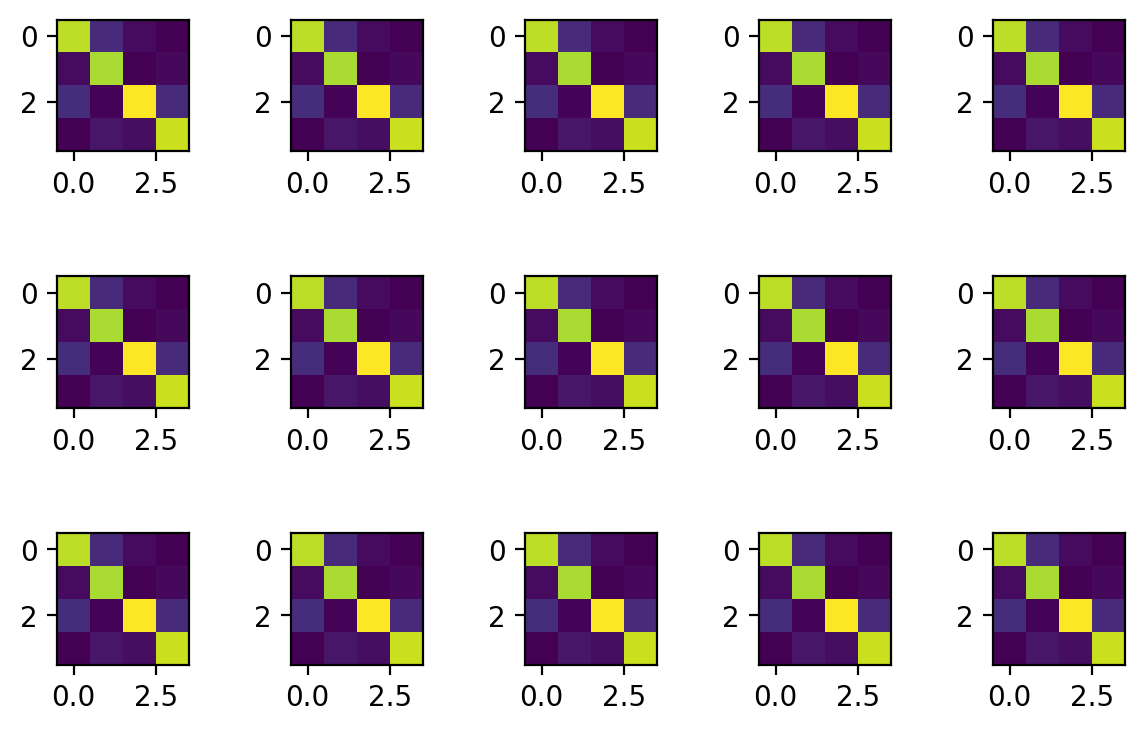

In [30]:
i = 0
fig, axs2d = plt.subplots(3,5, dpi = 200)
fig.tight_layout()
for axs in axs2d:
    for ax in axs:
        im = ax.imshow(cal_matrices[i])
        # cbar = ax.figure.colorbar(im, ax=ax)
        # cbar.ax.set_ylabel("probability", rotation=-90, va="bottom")
        # ax.xlabel("input states")
        # ax.ylabel("output states")
        # ax.title("readout calibration matrix of qubit (6 , "+str(path[i])+") on Rigetti Aspen-11")
        # ax.show()

In [23]:
for qubit, cal_matrix in zip(path, cal_matrices):
    print("qubit", 6, qubit, ": [", cal_matrix[0,3], cal_matrix[1,2], cal_matrix[2,1], cal_matrix[3,0], "]")

qubit 6 7 : [ 0.0029296875 0.00146484375 0.0115966796875 0.004638671875 ]
qubit 6 0 : [ 0.0103759765625 0.001220703125 0.0023193359375 0.000244140625 ]
qubit 6 1 : [ 0.008056640625 0.00048828125 0.00732421875 0.0006103515625 ]
qubit 6 16 : [ 0.010498046875 0.0010986328125 0.0013427734375 0.0 ]
qubit 6 17 : [ 0.013916015625 0.00048828125 0.01416015625 0.001953125 ]
qubit 6 10 : [ 0.003173828125 0.0003662109375 0.00341796875 0.000732421875 ]
qubit 6 11 : [ 0.008056640625 0.0009765625 0.00390625 0.0003662109375 ]
qubit 6 26 : [ 0.001220703125 0.0003662109375 0.0045166015625 0.0003662109375 ]
qubit 6 27 : [ 0.0062255859375 0.000732421875 0.005126953125 0.0006103515625 ]
qubit 6 20 : [ 0.00244140625 0.000244140625 0.0052490234375 0.000244140625 ]
qubit 6 21 : [ 0.0035400390625 0.000732421875 0.011962890625 0.0018310546875 ]
qubit 6 36 : [ 0.0013427734375 0.0006103515625 0.001220703125 0.0 ]
qubit 6 37 : [ 0.00439453125 0.0001220703125 0.0380859375 0.005615234375 ]
qubit 6 30 : [ 0.004394531

# Check the correctness

In [24]:
job = execute(meas_calibs, backend, shots=1 << 13, initial_layout=[6,100], optimization_level=3)

/opt/conda/lib/python3.9/site-packages/qiskit_rigetti/_qcs_job.py:117: UserWarning: barriers are currently omitted during execution on a RigettiQCSBackend
  warnings.warn("barriers are currently omitted during execution on a RigettiQCSBackend")
/opt/conda/lib/python3.9/site-packages/rpcq/_client.py:202: UserWarning: SIMPLE-WARNING: Unhandled pragma in qubit relabeling: #<PRAGMA OPENQASM 2.0>
  warn(f"{warning.kind}: {warning.body}")


# Tensor Product Noise Model (not used)

In [ ]:
result = records["result"]
meas_fitter = records["meas_fitter"]
cal_matrix = meas_fitter.cal_matrix

In [3]:
from qiskit.ignis.mitigation.measurement import TensoredMeasFitter

In [5]:
from qiskit.result import Result

def separate_results(one_job_results):
    return [Result(backend_name=one_job_results.backend_name,
                   backend_version=one_job_results.backend_version,
                   qobj_id=one_job_results.qobj_id,
                   job_id=one_job_results.job_id,
                   success=True,
                   results=[results]) for results in one_job_results.results]


def merge_results(results_list):
    results = []
    for res in results_list:
        results += res.results
    return Result(backend_name=results_list[0].backend_name,
                  backend_version=results_list[0].backend_version,
                  qobj_id=results_list[0].qobj_id,
                  job_id=results_list[0].job_id,
                  success=True,
                  results=results)

In [6]:
results_list = separate_results(result)

In [7]:
len(results_list)

256

In [8]:
tensored_result = merge_results([results_list[0], results_list[-1]])

In [21]:
tensored_fitter = TensoredMeasFitter(tensored_result, mit_pattern=[[i] for i in range(num_qubits)])

In [22]:
tensored_fitter.cal_matrices

[array([[0.98364258, 0.10070801],
        [0.01635742, 0.89929199]]),
 array([[0.94384766, 0.07263184],
        [0.05615234, 0.92736816]]),
 array([[0.94445801, 0.12524414],
        [0.05554199, 0.87475586]]),
 array([[0.81604004, 0.13793945],
        [0.18395996, 0.86206055]]),
 array([[0.93054199, 0.09289551],
        [0.06945801, 0.90710449]]),
 array([[0.90795898, 0.0390625 ],
        [0.09204102, 0.9609375 ]]),
 array([[0.98486328, 0.05224609],
        [0.01513672, 0.94775391]]),
 array([[0.9329834 , 0.03234863],
        [0.0670166 , 0.96765137]])]

- 

# TODO

- check the difference of the full calibration matrix and tensor product of the single qubit calibration matrix
- check the difference of the magnitude of the correlations between different order of correlation: 2-qubit / 3-qubit

$\rho_{ABC}$→$\rho_A, \rho_B, \rho_C$

$\rho_A, \rho_B, \rho_C$→$\rho_{ABC}$

$\rho_{AB}$, $\rho_{BC}$, $\rho_{CA}$, $\rho_A, \rho_B, \rho_C$